---
# Dataset
---

In [10]:
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import confusion_matrix
from random import shuffle

In [11]:
data = datasets.load_iris()

ind_list = [i for i in range(len(data.data))]
shuffle(ind_list)

In [12]:
X = data.data[ind_list[ : 120], : 2]
Y = data.target[ind_list[ : 120]]
test_X = data.data[ind_list[120 : ] , : 2]
test_Y = data.target[ind_list[120 : ]]

In [13]:
print(X.shape)
print(Y.shape)
print(test_X.shape)
print(test_Y.shape)

(120, 2)
(120,)
(30, 2)
(30,)


---
# KNN
---

In [14]:
model = neighbors.KNeighborsClassifier(5) # K = 5로 지정
model.fit(X,Y)

KNeighborsClassifier()

In [15]:
pred = model.predict(test_X)
print("정확도:", accuracy_score(test_Y, pred)) #예측값과 실제값 비교

정확도: 0.7333333333333333


In [16]:
confusion_matrix(test_Y, pred)

array([[11,  0,  0],
       [ 0,  6,  4],
       [ 0,  4,  5]])

---
# Cross-Validation
----

In [17]:
from sklearn.model_selection import cross_val_score

In [27]:
k_range = range(1,100)  # k를 1~100까지 고려하여 최적의 k를 찾기
k_score = []   # 각 k들의 성능을 비교하기 위한 리스트 생성

In [28]:
for k in k_range :
	knn = neighbors.KNeighborsClassifier(k)
	scores = cross_val_score(knn,X,Y,cv=10,scoring = "accuracy")    # 10-fold cross-validation
	k_score.append(scores.mean()) # 10-fold 각각 정확도의 평균으로 성능계산 

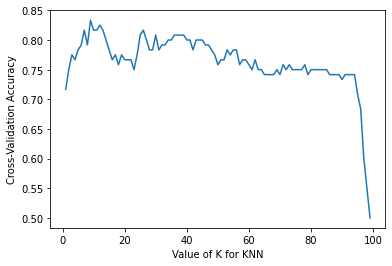

In [29]:
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

- K가 커질수록 데이터의 정확도가 떨어지는 것을 볼 수 있음 
- 대략적으로 K가 10 언저리에서 가장 이상적이라 판단 가능

---
# KNN 재구현
----

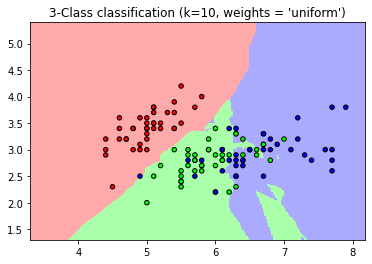

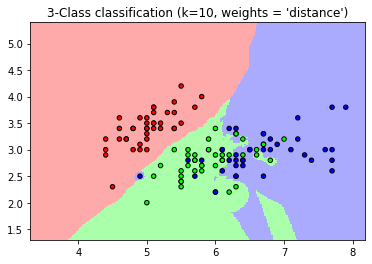

In [31]:
n_neighbors = 10 # 앞의 cross-validation을 통해 확인한 k기준
h = 0.02    # meshgrid를 위한 step-size 

cmap_light = ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])

for weights in ['uniform', 'distance']:
  model = neighbors.KNeighborsClassifier(n_neighbors,weights=weights)
  model.fit(X,Y)
    
  # Decision Boundary를 위한 meshgrid plot    
  X_min,X_max = test_X[:,0].min()-1, test_X[:,0].max()+1                  
  Y_min,Y_max = test_X[:,1].min()-1, test_X[:,1].max()+1                  
  XX,YY = np.meshgrid(np.arange(X_min,X_max,h), np.arange(Y_min,Y_max,h))
  Z = model.predict(np.c_[XX.ravel(),YY.ravel()])
  
  # color plot으로 결과를 삽입
  Z = Z.reshape(XX.shape)
  plt.figure()
  plt.pcolormesh(XX,YY,Z, cmap = cmap_light)      
    
  # 학습용 데이터의 산점도 표출    
  plt.scatter(X[:,0], X[:,1], c=Y, cmap = cmap_bold, edgecolor='k', s=20)
  plt.xlim(XX.min(), XX.max())
  plt.ylim(YY.min(), YY.max())
  plt.title("3-Class classification (k=%i, weights = '%s')" % (n_neighbors, weights))
plt.show()